# Model of primary in 2019

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pingouin as pg


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }




In [3]:
df = pd.read_csv('../data/3-oro/Merge_2019_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467110 entries, 0 to 467109
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 117.6+ MB


In [5]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2019,111001000078,111001000078,5,1000003730,CR 51 D # 35 SUR - 45,11,1,3,43.0,2002-04-23,0,99,0,0,0,9,0,6,1,5,11,1,0,1,9,1,16,4,16,1,100,0,4385957,16,4407,ALCALA,CL 36 SUR 51 04 PI 2 AP 202,0,BARRIO ZONA URBANA,1,1,2,1,1,1,1,1,1,3,1,3,1,3,1,1,1,1,3,2,1,1,1,1,1,1,1,0,1,0,1,1,2,1,1,1,0,1,1,2,2,2,0,1,0,0,0,2,5,2,3,2,4,2,0,5,0,3,1,5,3,1,3,0,0,9,0,2,0,0,0,0,0,1,1,3,43.919998,Hacinamiento_medio,1,2.5,0,29,561,319,19.344828,0.568627,28,0.965517,265.478873,71


In [6]:
df["POB_VICT_CONF"].value_counts()

99    450622
1      14998
9        950
3        247
2        109
4        101
10        74
20         5
17         2
6          1
18         1
Name: POB_VICT_CONF, dtype: int64

In [7]:
dict_vict_recod = {
    99: 0,
    1 : 1,
    9 : 1,
    3 : 1,
    2 : 1,
    4 : 1,
    10 : 1,
    20 : 1,
    17 : 1,
    6: 1,
    18: 1
}

In [8]:
df['POB_VICT_CONF'] = df['POB_VICT_CONF'].replace(dict_vict_recod)

## Initial Variables

In [9]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE'

             ]

# Part A: Feature Selection

## Filter by grade Level and Methodology

In [10]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.423956
3    0.383991
4    0.136013
1    0.056040
Name: NIVEL, dtype: float64

In [11]:
df = df[(df['NIVEL']== 2)]

In [12]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    0.973611
9    0.026389
Name: CODIGO_METODOLOGIA, dtype: float64

In [13]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Dependent$$
$$ H_{a}: The \: variables \:are \: not \: Dependent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [14]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
              Category        p-value
4    DIR_NUM_LOCALIDAD  1.677838e-270
0               GENERO   7.537762e-37
2    TIPO_DISCAPACIDAD   2.444873e-18
7           computador   4.710577e-14
6              teneviv   2.409088e-11
3       CODIGO_JORNADA   8.621747e-08
1        POB_VICT_CONF   1.976335e-04
9          ES_BILINGUE   2.120649e-04
8           tiene_auto   3.163257e-04
5  todos_servicios_Pub   4.798505e-02


In [15]:
categorias = cat_dep

In [16]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


# Univariate Feature Selection for continous data
## Difference in means test 
### Part I: Features with dependence against REPITENTE

In [17]:
differentMean = pd.DataFrame(columns = ['numeric', 'p-value'])
cat_con = []
p_valuesc = []

for i in variables:
    df_r = df[df["REPITENTE"] == 1][i]
    df_nr = df[df["REPITENTE"] == 0][i]
    p_val = float(pg.ttest(df_r,df_nr)["p-val"][0])
    
    if p_val <= 0.05:
        cat_con.append(i)
        p_valuesc.append(p_val)
        
print('Dependent variables that reject H0 at a significance level of 5%')
differentMean['numeric'] = cat_con
differentMean['p-value'] = p_valuesc
print(differentMean.sort_values(by = 'p-value'))

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:211: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Dependent variables that reject H0 at a significance level of 5%
                     numeric        p-value
0                       EDAD  6.961966e-231
6   PROP_DOCENTES_CON_TITULO   2.781817e-60
1           puntaje_sisben_3   7.379521e-36
5  TOTAL_DOCENTES_CON_TITULO   4.272705e-20
4            COMPU_POR_ALUMN   2.886627e-11
7               promepuntaje   9.008413e-06
3          ALUMN_POR_DOCENTE   3.549154e-04
2       TOTAL_EQUIPO_COMPUTO   1.367768e-02


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

### Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.

**Box- Tidwell Test**

In [18]:
y = df['REPITENTE']
y.shape

(192808,)

In [19]:
X = df[variables]
X.shape

(192808, 10)

In [20]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

<ipython-input-21-a73a6ccc77d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [22]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [23]:
X_cons = sm.add_constant(X, prepend=False)

In [24]:
## Should not print anything
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [25]:
## Shouel not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [26]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               192808
Model:                            GLM   Df Residuals:                   192787
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29831.
Date:                Mon, 04 Jul 2022   Deviance:                       59663.
Time:                        19:09:25   Pearson chi2:                 2.04e+05
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01368
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                        0.7557      0.126      5.978      0.000       0.508       1.003
estrato                                                     1.5960      0.160      9.981      0.000       1.283       1.909
puntaje_sisben_3                                           -0.0004      0.014     -0.029      0.977      -0.027       0.026
indice_hacinamiento                                         0.1764      0.065      2.706      0.007       0.049       0.304
TOTAL_EQUIPO_COMPUTO                                        0.0197      0.002     12.693      0.000       0.017       0.023
ALUMN_POR_DOCENTE                                          -0.8269      0.081    -10.225      0.000      -0.985      -0.668
COMPU_POR_ALUMN                                            -1.8753      0.188     -9.950      0.000      -2.245      -1.506
TOTAL_DOCENTES_CON_TITULO                                   0.0030      0.005      0.593      0.553      -0.007       0.013
PROP_DOCENTES_CON_TITULO                                   -0.0518      0.088     -0.586      0.558      -0.225       0.121
promepuntaje                                               -0.3877      0.125     -3.102      0.002      -0.633      -0.143
EDAD:Log_EDAD                                              -0.1650      0.039     -4.222      0.000      -0.242      -0.088
estrato:Log_estrato                                        -0.9250      0.099     -9.372      0.000      -1.118      -0.732
puntaje_sisben_3:Log_puntaje_sisben_3                      -0.0015      0.003     -0.496      0.620      -0.007       0.004
indice_hacinamiento:Log_indice_hacinamiento                -0.0488      0.027     -1.796      0.073      -0.102       0.004
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              -0.0027      0.000    -11.987      0.000      -0.003      -0.002
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                     0.1958      0.019     10.266      0.000       0.158       0.233
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                         1.2013      0.304      3.958      0.000       0.606       1.796
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO    -0.0024      0.001     -2.492      0.013      -0.004      -0.001
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO      -2.1775      0.190    -11.478      0.000      -2.549      -1.806
promepuntaje:Log_promepuntaje                               0.0594      0.019      3.109      0.002       0.022       0.097
const                                                      10.4883      4.846      2.164      0.030       0.990      19.987
===========================================================================================================

In [27]:
logit_results.pvalues

EDAD                                                       2.259637e-09
estrato                                                    1.854989e-23
puntaje_sisben_3                                           9.771954e-01
indice_hacinamiento                                        6.805565e-03
TOTAL_EQUIPO_COMPUTO                                       6.486533e-37
ALUMN_POR_DOCENTE                                          1.529934e-24
COMPU_POR_ALUMN                                            2.532169e-23
TOTAL_DOCENTES_CON_TITULO                                  5.528598e-01
PROP_DOCENTES_CON_TITULO                                   5.575632e-01
promepuntaje                                               1.919741e-03
EDAD:Log_EDAD                                              2.416836e-05
estrato:Log_estrato                                        7.144785e-21
puntaje_sisben_3:Log_puntaje_sisben_3                      6.200242e-01
indice_hacinamiento:Log_indice_hacinamiento                7.255

In [28]:
logit_results.pvalues[logit_results.pvalues > 0.05]

puntaje_sisben_3                               0.977195
TOTAL_DOCENTES_CON_TITULO                      0.552860
PROP_DOCENTES_CON_TITULO                       0.557563
puntaje_sisben_3:Log_puntaje_sisben_3          0.620024
indice_hacinamiento:Log_indice_hacinamiento    0.072555
dtype: float64

In [29]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['puntaje_sisben_3', 'TOTAL_DOCENTES_CON_TITULO',
       'PROP_DOCENTES_CON_TITULO', 'puntaje_sisben_3:Log_puntaje_sisben_3',
       'indice_hacinamiento:Log_indice_hacinamiento'],
      dtype='object')

In [30]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['puntaje_sisben_3', 'indice_hacinamiento']

In [31]:
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [32]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [33]:
X_cons['REPITENTE'] = y

In [34]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ puntaje_sisben_3 + puntaje_sisben_3 : np.log(puntaje_sisben_3) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento)'

In [35]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.161124
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               192808
Model:                          Logit   Df Residuals:                   192803
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                0.002992
Time:                        19:09:27   Log-Likelihood:                -31066.
converged:                       True   LL-Null:                       -31159.
Covariance Type:            nonrobust   LLR p-value:                 3.038e-39
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          -3.3197      0.140    -23.674      0.000      -3.595      -3.045
puntaje_sisben_3                                    0.0064      0.013      0.477      0.633      -0.020       0.033
puntaje_sisben_3:np.log(puntaje_sisben_3)          -0.0029      0.003     -0.994      0.320      -0.009       0.003
indice_hacinamiento                                 0.1115      0.064      1.734      0.083      -0.015       0.237
indice_hacinamiento:np.log(indice_hacinamiento)    -0.0249      0.027     -0.930      0.353      -0.077       0.028
===================================================================================================================
"""

In [36]:
model.pvalues[model.pvalues > 0.05]

puntaje_sisben_3                                   0.633359
puntaje_sisben_3:np.log(puntaje_sisben_3)          0.320271
indice_hacinamiento                                0.082994
indice_hacinamiento:np.log(indice_hacinamiento)    0.352510
dtype: float64

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same reference as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [37]:
all_variables = variables + categorias
y = df['REPITENTE']
X = df[all_variables]


In [38]:
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               192808
Model:                            GLM   Df Residuals:                   192796
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32185.
Date:                Mon, 04 Jul 2022   Deviance:                       64370.
Time:                        19:09:28   Pearson chi2:                 2.47e+05
No. Iterations:                     7   Pseudo R-squ. (CS):           -0.01070
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0272      0.001    -37.112      0.000      -0.029      -0.026
indice_hacinamiento    -0.2540      0.008    -31.076      0.000      -0.270      -0.238
GENERO                  0.0713      0.023      3.152      0.002       0.027       0.116
POB_VICT_CONF           0.0507      0.060      0.853      0.394      -0.066       0.167
TIPO_DISCAPACIDAD       0.2725      0.054      5.001      0.000       0.166       0.379
CODIGO_JORNADA         -0.2202      0.010    -22.348      0.000      -0.240      -0.201
DIR_NUM_LOCALIDAD      -0.0231      0.002    -10.870      0.000      -0.027      -0.019
todos_servicios_Pub    -0.4117      0.027    -15.097      0.000      -0.465      -0.358
teneviv                -0.2061      0.014    -14.702      0.000      -0.234      -0.179
computador             -0.1172      0.039     -2.970      0.003      -0.195      -0.040
tiene_auto             -0.0972      0.116     -0.837      0.402      -0.325       0.130
ES_BILINGUE             0.1853      0.060      3.065      0.002       0.067       0.304
=======================================================================================
"""

In [39]:
# Get influence measures
influence = logit_results.get_influence()

In [40]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [41]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-41-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-41-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [42]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [43]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
235820,0.001470,6.522330
414298,0.001461,6.052294
130471,0.001380,6.216804
146865,0.001377,4.944202
151245,0.001343,5.251361


In [44]:
extreme.shape

(6643, 2)

In [45]:
extreme.index

Int64Index([   411,   3363,   3555,   3627,   3650,   3651,   4160,   4267,
              4281,   4341,
            ...
            454742, 454801, 454809, 454908, 454926, 454939, 455440, 455545,
            455770, 455791],
           dtype='int64', length=6643)

In [46]:
df.index

Int64Index([   297,    298,    299,    305,    307,    308,    309,    310,
               311,    312,
            ...
            464805, 465049, 465757, 465764, 466865, 466875, 466878, 466881,
            466883, 466894],
           dtype='int64', length=192808)

In [47]:
# Delete undesirable outliers
df = df.loc[~df.index.isin(extreme.index)]

In [48]:
df.index

Int64Index([   297,    298,    299,    305,    307,    308,    309,    310,
               311,    312,
            ...
            464805, 465049, 465757, 465764, 466865, 466875, 466878, 466881,
            466883, 466894],
           dtype='int64', length=186165)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-49-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


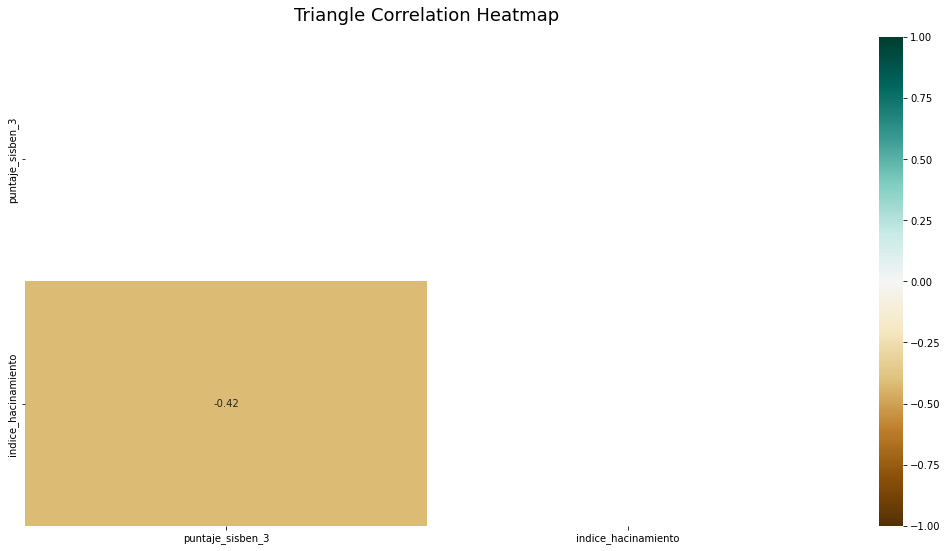

In [49]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,puntaje_sisben_3,2.439818
1,indice_hacinamiento,2.439820


In [51]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 5: # The statndard rule to discard a variable is: VIF >5
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [52]:
variables

['indice_hacinamiento', 'puntaje_sisben_3']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [53]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [54]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
0,GENERO,6
2,TIPO_DISCAPACIDAD,4
1,POB_VICT_CONF,3
9,ES_BILINGUE,3
7,computador,2
8,tiene_auto,2
5,todos_servicios_Pub,1
6,teneviv,1
3,CODIGO_JORNADA,0
4,DIR_NUM_LOCALIDAD,0


In [55]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
0,GENERO,6,TIPO_DISCAPACIDAD
2,TIPO_DISCAPACIDAD,4,POB_VICT_CONF
1,POB_VICT_CONF,3,ES_BILINGUE
9,ES_BILINGUE,3,computador
7,computador,2,tiene_auto
8,tiene_auto,2,todos_servicios_Pub
5,todos_servicios_Pub,1,teneviv
6,teneviv,1,CODIGO_JORNADA
3,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD
4,DIR_NUM_LOCALIDAD,0,NaN


In [56]:
independent = independent.reset_index()

In [57]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [58]:
vals.append(1)

In [59]:
independent['p_values'] = vals

In [60]:
independent

,index,Category,counts,Below,p_values
0,0,GENERO,6,TIPO_DISCAPACIDAD,1.549392e-69
1,2,TIPO_DISCAPACIDAD,4,POB_VICT_CONF,2.104256e-01
2,1,POB_VICT_CONF,3,ES_BILINGUE,7.383036e-01
3,9,ES_BILINGUE,3,computador,1.196565e-46
4,7,computador,2,tiene_auto,0.000000e+00
5,8,tiene_auto,2,todos_servicios_Pub,7.773914e-53
6,5,todos_servicios_Pub,1,teneviv,0.000000e+00
7,6,teneviv,1,CODIGO_JORNADA,3.046252e-42
8,3,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD,0.000000e+00
9,4,DIR_NUM_LOCALIDAD,0,NaN,1.000000e+00


In [61]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

0


In [62]:
cat_iid

['GENERO']

In [63]:
categorias = cat_iid

------------------

### Run Models

In [64]:
def formula_maker(dependiente, variables, categorias):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
    for categoria in categorias:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'C({categoria})'
    return formula  

In [65]:
formula=formula_maker('REPITENTE', variables, categorias)
model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
model.summary()

Optimization terminated successfully.
         Current function value: 0.020075
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               186165
Model:                          Logit   Df Residuals:                   186161
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                  0.1768
Time:                        19:09:36   Log-Likelihood:                -3737.2
converged:                       True   LL-Null:                       -4539.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.2411      0.163     -1.475      0.140      -0.561       0.079
C(GENERO)[T.1]          0.5294      0.080      6.606      0.000       0.372       0.687
indice_hacinamiento    -0.7819      0.042    -18.787      0.000      -0.863      -0.700
puntaje_sisben_3       -0.1254      0.004    -31.326      0.000      -0.133      -0.118
=======================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [66]:
formula=formula_maker('REPITENTE', variables, categorias)
model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
model.summary()

         Current function value: 0.020083
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 43


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               186165
Model:                          Logit   Df Residuals:                   186161
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                  0.1765
Time:                        19:09:39   Log-Likelihood:                -3738.8
converged:                      False   LL-Null:                       -4539.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0379      0.162      0.234      0.815      -0.280       0.356
C(GENERO)[T.1]          0.4531      0.079      5.749      0.000       0.299       0.608
indice_hacinamiento    -0.8385      0.042    -19.834      0.000      -0.921      -0.756
puntaje_sisben_3       -0.1286      0.004    -32.041      0.000      -0.136      -0.121
=======================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [67]:
all_vars = variables + categorias

In [68]:
X = df[all_vars]

In [69]:
X

,indice_hacinamiento,puntaje_sisben_3,GENERO
297,3.500000,42.310001,0
298,1.000000,55.910000,0
299,1.333008,38.230000,0
305,5.000000,20.590000,1
307,1.500000,75.120003,1
...,...,...,...
466875,5.000000,34.200001,1
466878,5.000000,34.200001,0
466881,4.000000,18.190001,0
466883,5.000000,27.030001,1


In [70]:
y = df['REPITENTE']
y

297       0
298       0
299       0
305       0
307       0
         ..
466875    0
466878    0
466881    0
466883    0
466894    0
Name: REPITENTE, Length: 186165, dtype: uint8

In [71]:
X = pd.get_dummies(X, columns=categorias, drop_first=True)
X.head(2)

,indice_hacinamiento,puntaje_sisben_3,GENERO_1
297,3.5,42.310001,0
298,1.0,55.910000,0


In [72]:
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               186165
Model:                            GLM   Df Residuals:                   186163
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3738.3
Date:                Mon, 04 Jul 2022   Deviance:                       7476.6
Time:                        19:09:40   Pearson chi2:                 9.00e+04
No. Iterations:                    10   Pseudo R-squ. (CS):           0.008575
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
indice_hacinamiento    -0.8314      0.025    -32.891      0.000      -0.881      -0.782
puntaje_sisben_3       -0.1291      0.003    -41.601      0.000      -0.135      -0.123
GENERO_1                0.4949      0.076      6.517      0.000       0.346       0.644
=======================================================================================
"""

In [73]:
variables

['indice_hacinamiento', 'puntaje_sisben_3']

In [74]:
categorias

['GENERO']

### Conclusions